In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.qaoa.models.MaxCutProblem import MaxCutProblem

def visualize(data, x,y, hues, chart):
    fig = plt.figure(figsize=(12,9))
    match chart:
        case 'line':
            chart_type = sns.lineplot
        case 'bar':
            chart_type = sns.barplot
        case 'box':
            chart_type = sns.boxplot

    # make a copy to avoid modifying the original DataFrame and avoid warnings
    data_to_plot = data.copy()

    try:
        if len(hues) > 1:
            data_to_plot['hues'] = data_to_plot[hues].astype(str).agg('-'.join, axis=1)
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
        elif len(hues) == 1:
            data_to_plot['hues'] = data_to_plot[hues[0]]
            _ = chart_type(data=data_to_plot, x=x, y=y, hue='hues', palette='viridis')
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            _ = chart_type(data=data_to_plot, x=x, y=y)
            plt.legend(title=f'{y} for {x}, sorted by {[h + ", " for h in hues]}', bbox_to_anchor=(1.05, 1), loc='upper left')
            #plt.show()

            plt.axhline(y=1, color='red', linestyle='--', linewidth=2)

        plt.axhline(y=1, color='red', linestyle='--', linewidth=2)
        plt.show()
        plt.close(fig)
    except (KeyError, ValueError) as e:
        print(f"You've passed an incorrect column name.\n The correct ones are: \n{data_to_plot.columns}\nException: {e}")


### Configure the results you want to visualize under.

#### Pick multiple hues with ctrl or shift + click.
#### The "Exclude bad" removes the warm started hamming distances of >0 from the dataset.


In [30]:
import ast
import numpy as np


"""strings = ["results/results_papergraph_depth_{2, 10}_vertexcover_50RI.csv",
           "results/results_papergraph_depth_{2, 10}MaxCut_50RI.csv",
           "results/results_papergraph_depth_{2, 4, 6, 8, 10}.csv",
           "results/results_papergraph_depth_{2, 10}.csv"]"""
strings = [ #these are the 5,7,9 runs, i think. 
    "results/results_papergraph_depth_{1, 2, 4}_warm_start_{False, True}.csv",
    "results/results_papergraph_param_initialization_{'gaussian', 'static'}_depth_{1, 2, 10, 4}_warm_start_{False, True}.csv",
    "results/results_papergraph_param_initialization_{'gaussian', 'static'}_depth_{1, 2, 4}_warm_start_{False, True}.csv",
    "results/results_papergraph_param_initialization_{'static', 'gaussian'}_depth_{1, 2, 4}_warm_start_{False, True}.csv",
    "results/results_papergraph_param_initialization_{'static', 'gaussian'}_warm_start_{False, True}.csv",
    "results/results_papergraph_warm_start_{False, True}.csv",
    "results/results_papergraph_depth_{1, 2}_warm_start_{False, True}.csv",
    "results/results_papergraph_.csv"
]
strings = [
    "results/results_papergraph_qaoa_variant_{'multiangle', 'vanilla'}_depth_{2, 4, 6, 8, 10}.csv",
    "results/results_papergraph_depth_{2, 4, 6, 8, 10}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{2, 4, 6}_hamming_dist_{2, 4, 6}.csv",
    "results/results_papergraph_depth_{8, 10}_hamming_dist_{2, 4, 6}.csv"
]
strings = ["results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {1, 4}, 'warm_start'_ {False, True}, 'vertexcover'_ {True}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {1, 4}, 'warm_start'_ {True}, 'vertexcover'_ {True}, 'hamming_dist'_ {2, 4, 6}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {7}, 'warm_start'_ {False, True}, 'vertexcover'_ {True}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'vanilla'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {1, 10, 4, 7}, 'warm_start'_ {False, True}, 'vertexcover'_ {True}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'vanilla'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {1, 10, 4, 7}, 'warm_start'_ {True}, 'vertexcover'_ {True}, 'hamming_dist'_ {2, 4,.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {7}, 'warm_start'_ {True}, 'problem_type'_ {'minvertexcover'}, 'hamming_dist'_ .csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {10}, 'warm_start'_ {False, True}, 'problem_type'_ {'minvertexcover'}}.csv",
"results/results_papergraph_{'backend_mode'_ {'statevector'}, 'qaoa_variant'_ {'multiangle'}, 'param_initialization'_ {'gaussian'}, 'depth'_ {10}, 'warm_start'_ {True}, 'problem_type'_ {'minvertexcover'}, 'hamming_dist'_.csv"]

for file in strings:
    try:
        df = pd.read_csv(file)
        #print(f"File: {file}")
        #print(df['graph_name'].value_counts())
        #print("\n")
    except FileNotFoundError:
        print(f"File not found: {file}")

if len(strings) >1:
    results = pd.concat([pd.read_csv(path,index_col=0) for path in strings])

else:
    results = pd.read_csv(strings[0])



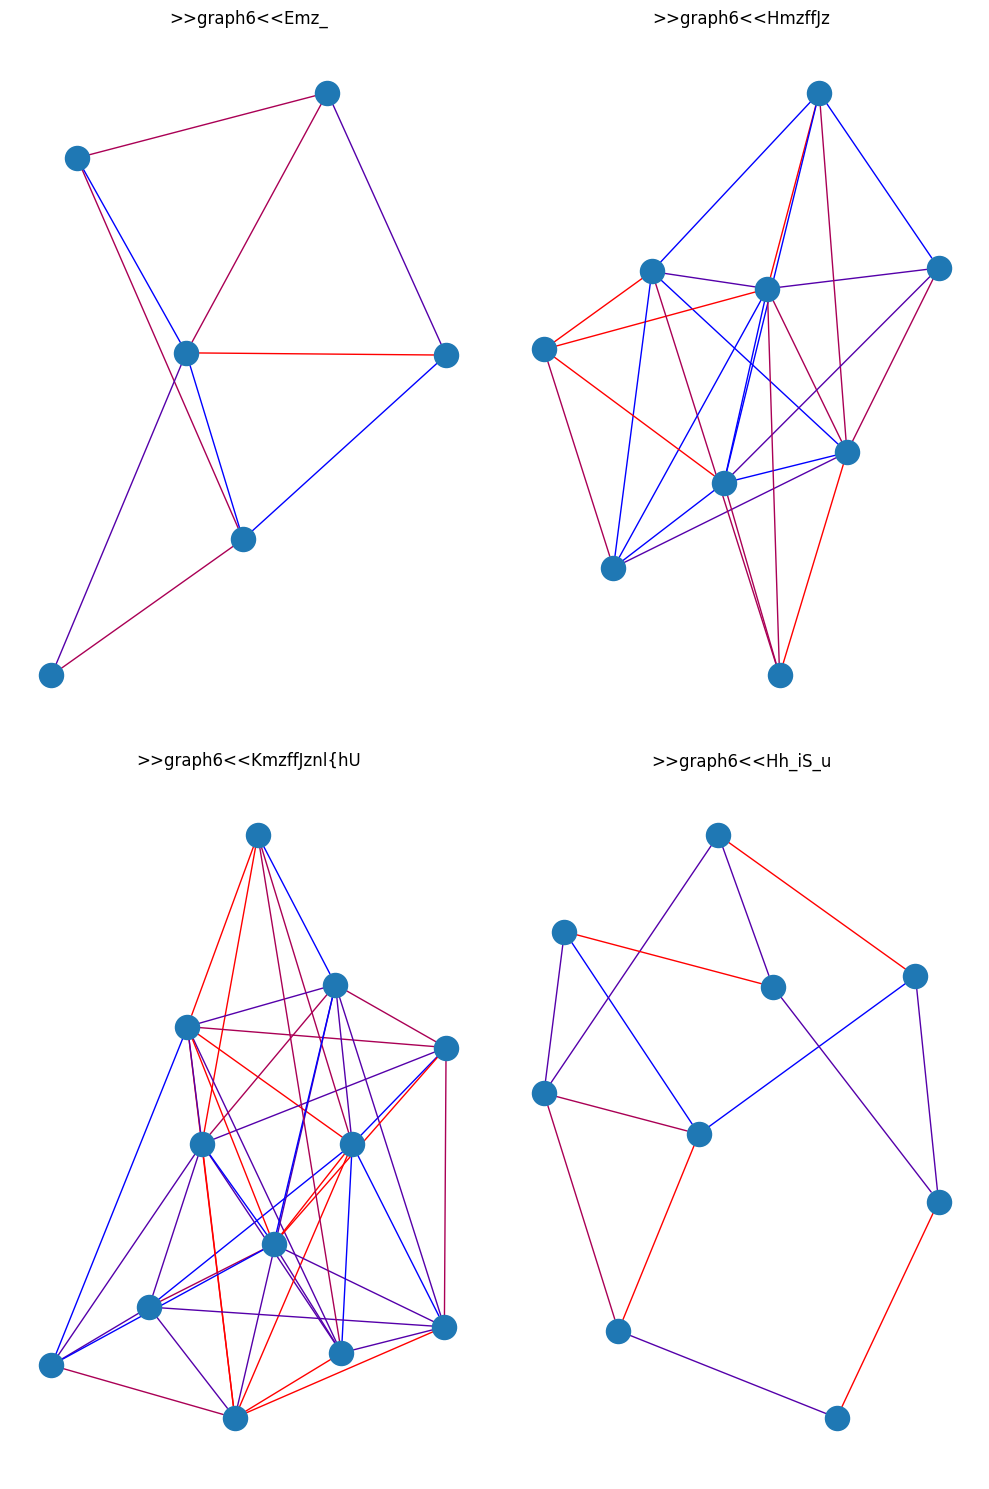

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
import networkx as nx
from rustworkx.visualization import mpl_draw as draw_graph_func


# set up problem and graphs
problem = MaxCutProblem()
graphs = problem.get_erdos_renyi_graphs_paper1()

# create a simple blue→red colormap
cmap = LinearSegmentedColormap.from_list("blue_red", ["blue", "red"])

fig, axs = plt.subplots(2, 2, figsize=(10, 15))
axs = axs.flatten()

for i, g in enumerate(graphs):
    ax = axs[i]

    # get (u, v, weight) triples
    weighted_edges = g.weighted_edge_list()
    weights = [w for _, _, w in weighted_edges]

    # normalize weights to [0,1]
    norm = Normalize(vmin=min(weights), vmax=max(weights))

    # map each weight to an RGB(A) from blue→red
    edge_colors = [cmap(norm(w)) for _, _, w in weighted_edges]

    # draw with the per-edge colours
    draw_graph_func(
        g,
        ax=ax,
        with_labels=False,
        edge_color=edge_colors,
    )

    # title with graph6 string
    graph = nx.Graph(list(g.edge_list()))
    graph6_string = nx.to_graph6_bytes(graph).decode("utf-8").strip()
    ax.set_title(graph6_string)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [32]:
from src.qaoa.models.solver import MinVertexCoverSolver


print(results['graph_name'].value_counts())

for g in graphs:
    # create a networkx graph from the rustworkx graph
    G = nx.Graph(list(g.edge_list()))
    graph6_string = nx.to_graph6_bytes(G).decode("utf-8").strip()
    solver = MinVertexCoverSolver(g, 'minvertexcover')
    mask = results['graph_name'] == graph6_string
    results.loc[results['graph_name'] == graph6_string, 'infeasible']= results.loc[mask, 'quantum_solution'].apply(lambda s: solver.evaluate_bitstring(ast.literal_eval(s),mark_infeasible=True)[1])




for index, row in results[mask].iterrows():
    if index == 0:
        continue
    row['infeasible'] = solver.evaluate_bitstring(ast.literal_eval(row['quantum_solution']), mark_infeasible=True)[1]
    results.iloc[index] = row

print(results.groupby('graph_name')['infeasible'].value_counts())





graph_name
>>graph6<<Emz_            2000
>>graph6<<HmzffJz         2000
>>graph6<<KmzffJznl{hU    2000
>>graph6<<Hh_iS_u         2000
Name: count, dtype: int64
graph_name              infeasible
>>graph6<<Emz_          False         1636
                        True            29
>>graph6<<Hh_iS_u       False         2688
                        True            98
>>graph6<<HmzffJz       False         1565
                        True           175
>>graph6<<KmzffJznl{hU  False         1524
                        True           285
Name: count, dtype: int64


In [ ]:
from ipywidgets import interact, interactive_output, widgets, HBox, VBox
import matplotlib.pyplot as plt
import ast, pandas as pd

# --- basic controls ----------------------------------------------------------
graph_names = ['All'] + results['graph_name'].unique().tolist()
y_options   = ['ratio', 'time_elapsed', 'quantum_func_evals', 'percent_measure_optimal']
x_options   = ['qaoa_variant', 'depth', 'hamming_dist', 'warm_start',
               'lagrangian_multiplier']
hue_options = x_options.copy()
chart_types = ['bar', 'line', 'box']
ws_options  = [False, True]

graph_dd   = widgets.Dropdown(options=graph_names,  description='Graph:')
x_dd       = widgets.Dropdown(options=x_options,     description='X axis:')
y_dd       = widgets.Dropdown(options=y_options,     description='Y axis:')
hues_ms    = widgets.SelectMultiple(options=hue_options, description='Hues:')
chart_dd   = widgets.Dropdown(options=chart_types,   description='Chart:')
ws_dd      = widgets.Dropdown(options=ws_options,    description='Exclude WS?')

# --- helper to build one "filter row" ----------------------------------------
all_cols   = results.columns.tolist()
ops        = ['>', '>=', '<', '<=', '==', '!=']

def make_filter_row(i: int):
    """Return widgets for a single filter row."""
    enable   = widgets.Checkbox(value=False, description=f'Filter {i}')
    col      = widgets.Dropdown(options=all_cols, description='Column')
    op       = widgets.Dropdown(options=ops,      description='Op')
    val      = widgets.Text(description='Value')
    return enable, col, op, val

flt1_enable, flt1_col, flt1_op, flt1_val = make_filter_row(1)
flt2_enable, flt2_col, flt2_op, flt2_val = make_filter_row(2)

filter_box = VBox([
    HBox([flt1_enable, flt1_col, flt1_op, flt1_val]),
    HBox([flt2_enable, flt2_col, flt2_op, flt2_val])
])

# --- function that actually draws -------------------------------------------
def _apply_single_filter(df, enable, col, op, val):
    """Apply one filter if `enable` is True."""
    if not enable:
        return df                     # nothing to do
    if col not in df.columns:
        return df                     # silent fail-safe
    try:                              # try to coerce the value to column dtype
        val = df[col].dtype.type(val)
    except Exception:
        pass
    expr = f"`{col}` {op} @val"            # back-ticks are harmless even if not needed
    return df.query(expr)


def update_visualization(graph_name, x, y, hues, chart,
                         exclude_warmstart,
                         # filter-1 widgets
                         f1_en, f1_col, f1_op, f1_val,
                         # filter-2 widgets
                         f2_en, f2_col, f2_op, f2_val):
    
    # --- start with the selected graph(s) ------------------------------------
    if graph_name == 'All':

        df = results.copy() 
    else:
        df = results[results['graph_name'] == graph_name].copy()
    
    # --- built-in warm-start exclusion ---------------------------------------
    if exclude_warmstart:
        df = df[df['hamming_dist'] == 0]
    
    # --- apply the two optional filters --------------------------------------
    df = _apply_single_filter(df, f1_en, f1_col, f1_op, f1_val)
    df = _apply_single_filter(df, f2_en, f2_col, f2_op, f2_val)
    
    # --- tidy + call your plotting helper ------------------------------------
    if hues:
        df = df.sort_values(by=[x] + list(hues))
    visualize(df, x=x, y=y, hues=list(hues), chart=chart)

# --- wire everything up ------------------------------------------------------
ui = VBox([
    HBox([graph_dd, x_dd, y_dd]),
    HBox([hues_ms, chart_dd, ws_dd]),
    filter_box
])

out = interactive_output(
    update_visualization,
    {
        'graph_name': graph_dd, 'x': x_dd, 'y': y_dd, 'hues': hues_ms,
        'chart': chart_dd, 'exclude_warmstart': ws_dd,
        
        # pipe the widgets for the two filters
        'f1_en': flt1_enable, 'f1_col': flt1_col, 'f1_op': flt1_op, 'f1_val': flt1_val,
        'f2_en': flt2_enable, 'f2_col': flt2_col, 'f2_op': flt2_op, 'f2_val': flt2_val
    }
)

display(ui, out)


Output()